In [1]:
def get_all_files_in_directory(directory):
    file_paths = []
    timestamps = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.txt'):
                file_paths.append(os.path.join(root, file))
                timestamp = os.path.basename(root)
                timestamps.append(timestamp)
    return file_paths, timestamps
    
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower()
    stop_words = set(["a", "an", "the", "and", "or", "but", "if", "on", "in", "to", "is", "of", "for"])
    words = [word for word in re.split(r'(\s+)', text) if word.strip() and (word in {'\n', '<br>', '<p>'} or (len(word) > 2 and word not in stop_words))]
    processed_text = ' '.join(words)
    return processed_text

In [2]:
pip install sentence-transformers bertopic


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 62.6 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.8
    Uninstalling Cython-3.0.8:
      Successfully uninstalled Cython-3.0.8
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install bertopic

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import re
import pandas as pd
import numpy as np
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

main_directory_path = '/kaggle/input/psb-conference-papers/Main Bodies/Main Bodies/'

print('get files')

file_paths, timestamps = get_all_files_in_directory(main_directory_path)


2024-07-19 17:56:38.093152: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-19 17:56:38.093301: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-19 17:56:38.247410: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


get files


In [5]:
texts = []
for file_path in file_paths:
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        processed_text = preprocess_text(text)
        texts.append(processed_text)

timestamps = pd.to_datetime(timestamps, errors='coerce')


In [6]:
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)

topics, probs = topic_model.fit_transform(texts)#, batch_embeddings)


2024-07-19 17:57:04,019 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/37 [00:00<?, ?it/s]

2024-07-19 17:58:28,031 - BERTopic - Embedding - Completed ✓
2024-07-19 17:58:28,032 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-07-19 17:58:40,787 - BERTopic - Dimensionality - Completed ✓
2024-07-19 17:58:40,788 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-07-19 17:58:40,903 - BERTopic - Cluster - Completed ✓
2024-07-19 17:58:40,913 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-07-19 17:58:42,932 - BERTopic - Representation - Completed ✓


In [7]:
freq = topic_model.get_topic_info(); freq.head(5)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,202,-1_gene_set_genes_using,"[gene, set, genes, using, protein, one, used, ...",[particular relevance researchers trying track...
1,0,154,0_snps_snp_disease_genetic,"[snps, snp, disease, genetic, plo, population,...",[current revolution genome sequencing technolo...
2,1,153,1_protein_proteins_structure_residues,"[protein, proteins, structure, residues, seque...",[many important sci tic medical industrial pro...
3,2,125,2_terms_ontology_information_text,"[terms, ontology, information, text, gene, sys...",[semantic web life sciences storing informatio...
4,3,94,3_gene_genes_expression_regulatory,"[gene, genes, expression, regulatory, transcri...",[information derived genome sequencing project...


In [8]:
topic_model.visualize_topics()

In [9]:
probs[200].shape

(19,)

In [10]:
topic_model.visualize_distribution(probs[10])

In [11]:
topic_model.visualize_barchart(top_n_topics=10)

In [12]:
topic_model.visualize_heatmap(n_clusters=10, width=1000, height=1000)

In [13]:
topic_model.visualize_term_rank()

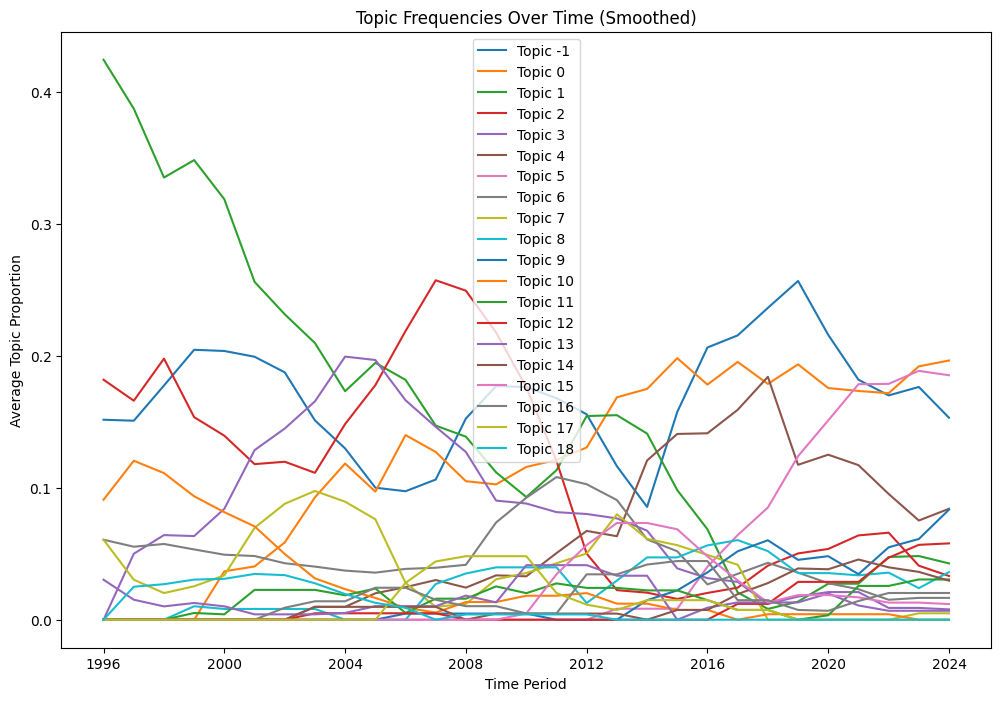

In [14]:
import matplotlib.pyplot as plt
df = pd.DataFrame({"Text": texts, "Timestamp": timestamps, "Topic": topics})

topic_over_time = df.groupby(['Timestamp', 'Topic']).size().unstack(fill_value=0)
topic_over_time = topic_over_time.div(topic_over_time.sum(axis=1), axis=0)

topic_over_time = topic_over_time.sort_index()

topic_over_time_smooth = topic_over_time.rolling(window=5, min_periods=1).mean()
plt.figure(figsize=(12, 8))
for topic in topic_over_time_smooth.columns:
    plt.plot(topic_over_time_smooth.index, topic_over_time_smooth[topic], label=f'Topic {topic}')
plt.xlabel('Time Period')
plt.ylabel('Average Topic Proportion')
plt.title('Topic Frequencies Over Time (Smoothed)')
plt.legend()
plt.show()